In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import pylab
import statsmodels.stats.api as sms
import scipy.stats
from scipy.stats import shapiro
from scipy.stats import levene

In [235]:
data=pd.read_csv('hmelq.csv')
df = data.copy()

# Description of Variables

**BAD**:The response(or Y) variable is BAD, which is coded as 0 (good risk) or 1 (bad risk).

**LOAN**: The amount of the loan requested 

**MORTDUE**: How much the customer needs to pay on their mortgage

**VALUE**: Assessed valuation (An assessed value is the dollar value assigned to a property to measure applicable taxes)

**REASON**: Debt consolidation or home improvement (DebtCon or HomeImp) (

**JOB**: Broad job category

**YOJ**: Years on the job

**DEROG**: Number of derogatory reports 

**DELINQ**: The number of delinquent trade lines (or credit accounts)

**CLAGE**: Age of oldest trade line (oldest tradeline= credit account)

**NINQ**: Number of recent credit inquiries (Soft inquiries are usually made when you request a credit report or credit score for yourself.)

**CLNO**: Number of trade lines

**DEBTINC**: Debt to income ratio 

# Summarize Dataset

In [63]:
df.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [65]:
df.shape 

(3576, 13)

In [64]:
df.isnull().sum()

bad          0
loan         0
mortdue    314
value       64
reason     147
job        167
yoj        312
derog      427
delinq     351
clage      179
ninq       303
clno       133
debtinc    767
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bad      3576 non-null   int64  
 1   loan     3576 non-null   int64  
 2   mortdue  3262 non-null   float64
 3   value    3512 non-null   float64
 4   reason   3429 non-null   object 
 5   job      3409 non-null   object 
 6   yoj      3264 non-null   float64
 7   derog    3149 non-null   float64
 8   delinq   3225 non-null   float64
 9   clage    3397 non-null   float64
 10  ninq     3273 non-null   float64
 11  clno     3443 non-null   float64
 12  debtinc  2809 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 363.3+ KB


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bad,3576.0,0.199385,0.399594,0.00,0.00,0.000,0.00,1.000
loan,3576.0,18529.697987,11262.834060,1100.00,11000.00,16200.000,23100.00,89900.000
mortdue,3262.0,74013.907992,44016.833772,2619.00,46700.25,65858.000,91717.00,399550.000
value,3512.0,101076.922759,54865.275351,8800.00,65753.00,89183.000,118928.25,850000.000
yoj,3264.0,8.832644,7.568046,0.00,3.00,7.000,13.00,41.000
derog,3149.0,0.261670,0.865178,0.00,0.00,0.000,0.00,10.000
delinq,3225.0,0.432558,1.099230,0.00,0.00,0.000,0.00,15.000
clage,3397.0,179.832529,87.066198,0.49,115.60,173.640,230.71,1168.230
ninq,3273.0,1.186373,1.728723,0.00,0.00,1.000,2.00,17.000
clno,3443.0,21.507116,10.167490,0.00,15.00,20.000,26.00,71.000


In [146]:
import researchpy as rp

In [148]:
rp.summary_cont(df[["mortdue","value","yoj","derog","delinq","clage","ninq","clno","debtinc"]])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,mortdue,3262.0,74013.9080,44016.8338,770.6848,72502.8326,75524.9834
1,value,3512.0,101076.9228,54865.2754,925.8067,99261.7493,102892.0963
2,yoj,3264.0,8.8326,7.5680,0.1325,8.5729,9.0924
3,derog,3149.0,0.2617,0.8652,0.0154,0.2314,0.2919
4,delinq,3225.0,0.4326,1.0992,0.0194,0.3946,0.4705
5,clage,3397.0,179.8325,87.0662,1.4938,176.9036,182.7614
6,ninq,3273.0,1.1864,1.7287,0.0302,1.1271,1.2456
7,clno,3443.0,21.5071,10.1675,0.1733,21.1674,21.8469
8,debtinc,2809.0,33.8317,9.0618,0.1710,33.4965,34.1670


In [234]:
rp.summary_cat(df[["reason","job"]])

,Variable,Outcome,Count,Percent
0,reason,DebtCon,2371,69.15
1,,HomeImp,1058,30.85
2,job,Other,1431,41.98
3,,ProfEx,767,22.50
4,,Office,569,16.69
5,,Mgr,461,13.52
6,,Self,115,3.37
7,,Sales,66,1.94


# Target Variable Analysis

In [127]:
count = pd.crosstab(df.bad,columns="count")
pergentage = pd.crosstab(df.bad, columns="frequency")/pd.crosstab(df.bad,columns="frequency").sum()
pd.concat([count,pergentage], axis=1)

col_0,count,frequency
bad,,
0,2863,0.800615
1,713,0.199385


0    2863
1     713
Name: bad, dtype: int64


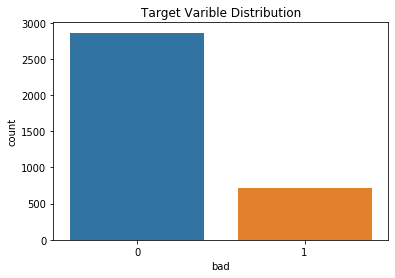

In [128]:
sns.countplot(x = "bad", data=df).set_title("Target Varible Distribution")
print(df["bad"].value_counts())


# Categorical Variables Visualization

In [129]:
count = pd.crosstab(df.job, columns="count")
pergentage = pd.crosstab(df.job, columns="frequency")/pd.crosstab(df.job,columns="frequency").sum()
pd.concat([count,pergentage], axis=1).T

job,Mgr,Office,Other,ProfEx,Sales,Self
col_0,,,,,,
count,461.00000,569.000000,1431.000000,767.000000,66.000000,115.000000
frequency,0.13523,0.166911,0.419771,0.224993,0.019361,0.033734


Other     1431
ProfEx     767
Office     569
Mgr        461
Self       115
Sales       66
Name: job, dtype: int64


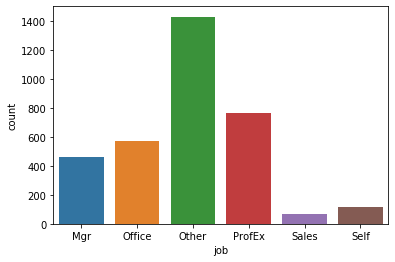

In [130]:
sns.countplot(x = "job", data=df)
print(df["job"].value_counts())

In [194]:
count = pd.crosstab(df.reason, columns="count")
pergentage = pd.crosstab(df.reason, columns="frequency")/pd.crosstab(df.reason,columns="frequency").sum()
pd.concat([count,pergentage], axis=1)

col_0,count,frequency
reason,,
DebtCon,2371,0.691455
HomeImp,1058,0.308545


DebtCon    2371
HomeImp    1058
Name: reason, dtype: int64


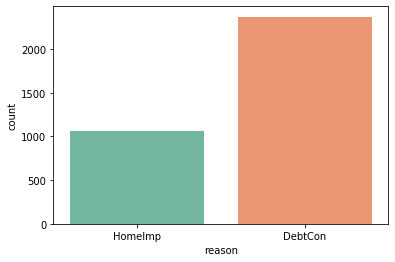

In [55]:
sns.countplot(x = "reason", data=df ,palette ="Set2")
print(df["reason"].value_counts())

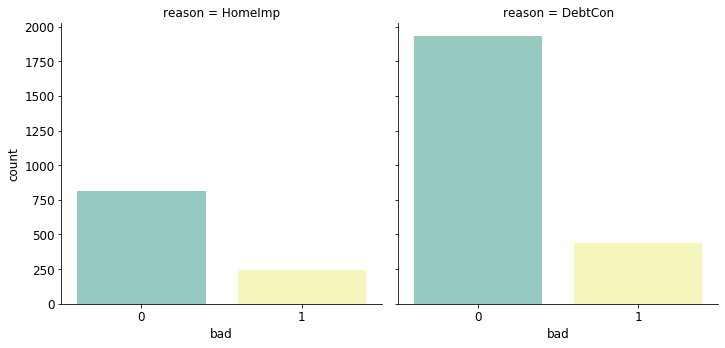

In [242]:
sns.catplot(x="bad", col="reason", data=data, palette="Set3", kind="count")

# Numerical Variables Visualization

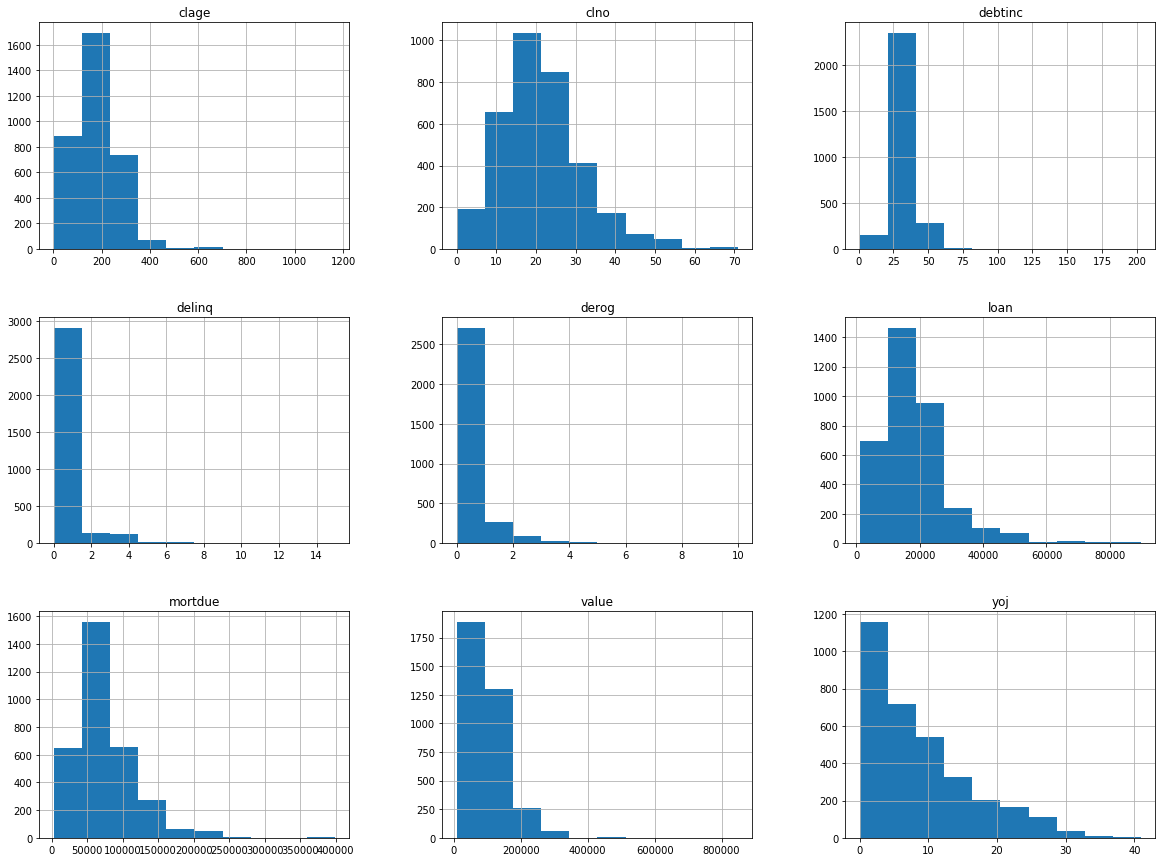

In [185]:
df_hist=df[["loan","clno",'mortdue', "derog","delinq","clage","value", "yoj", "debtinc"]]
df_hist.hist(bins=10)
plt.show()

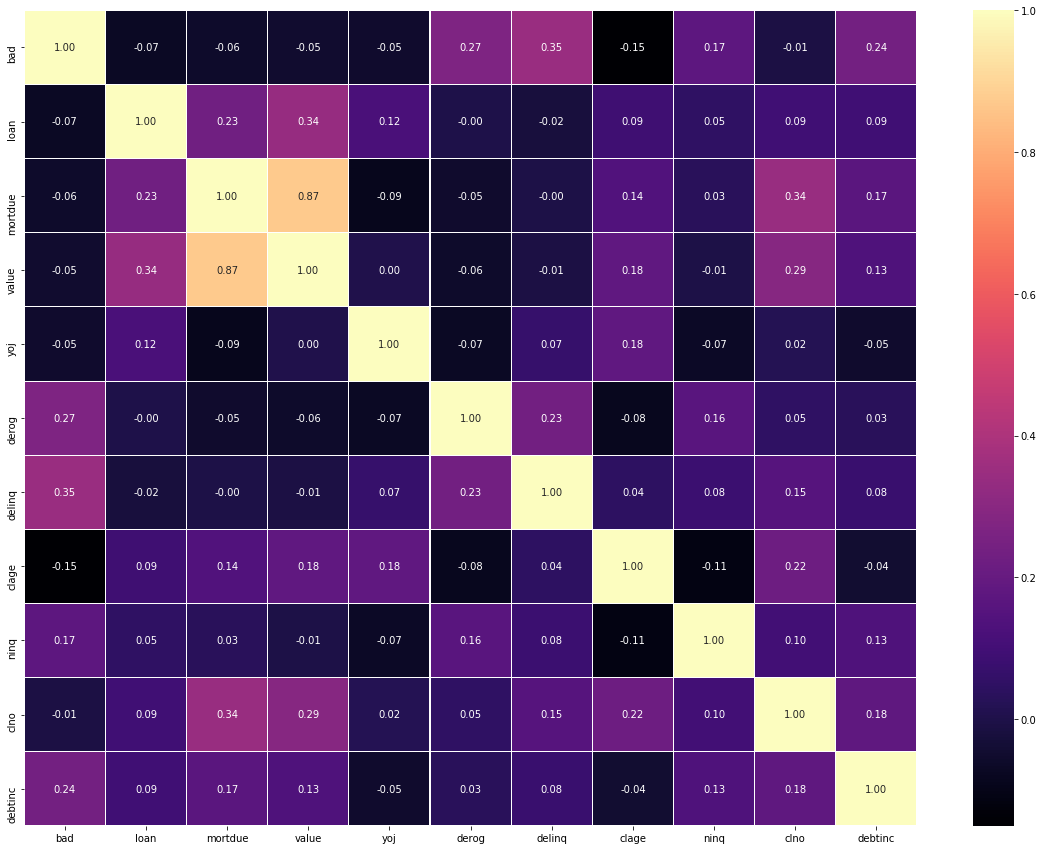

In [203]:
sns.heatmap(df.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")

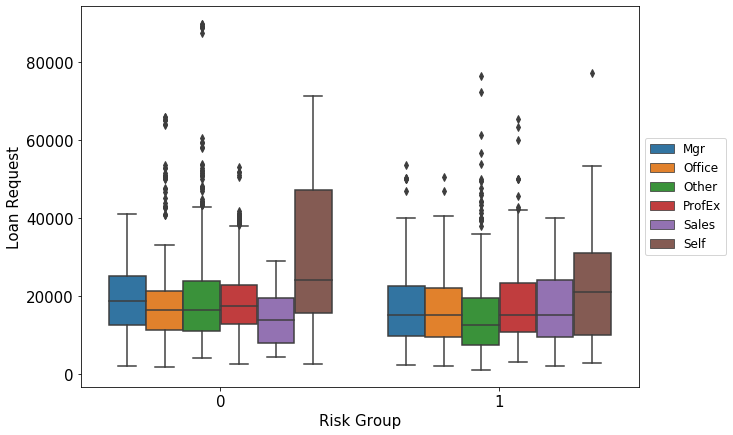

In [226]:
# LOAN VS RİSK
fig, ax = plt.subplots(figsize=(10, 7))
sns.boxplot(x = "bad", y = "loan", hue = "job", data = df)
plt.rcParams.update({'font.size': 12})
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Risk Group')
plt.ylabel('Loan Request')
plt.show()


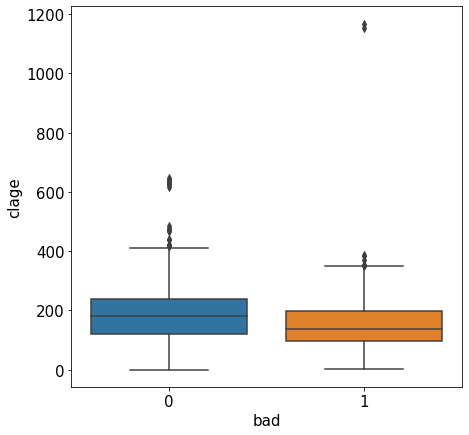

In [212]:
# BAD VS CLAGE
fig, ax=plt.subplots(figsize=(7,7))
sns.boxplot(x = "bad", y= "clage", data=df)

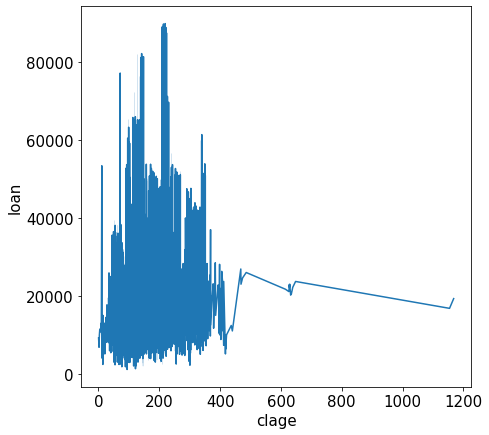

In [216]:
# CLAGE VS LOAN
fig, ax=plt.subplots(figsize=(7,7))
sns.lineplot(x = "clage", y = "loan", data = df);

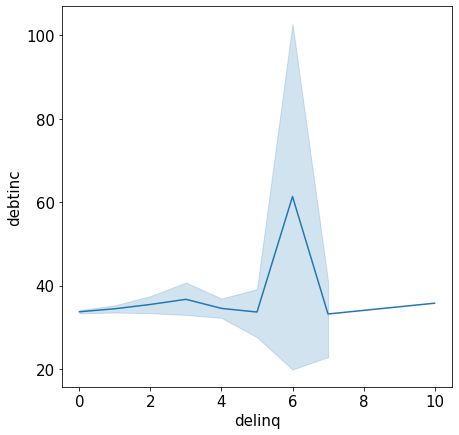

In [223]:
# DELINQ VS DEPTINC
fig, ax=plt.subplots(figsize=(7,7))
sns.lineplot(x = "delinq", y = "debtinc",data = df);

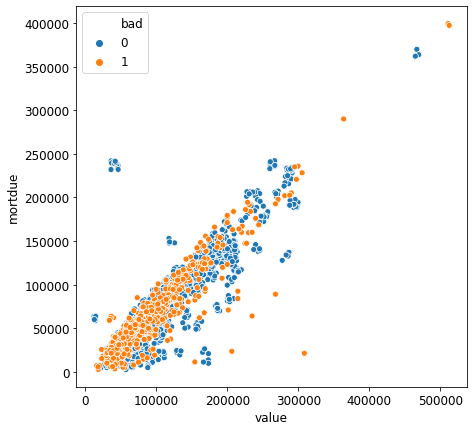

In [237]:
fig, ax=plt.subplots(figsize=(7,7))
sns.scatterplot(x="value", y= "mortdue",hue= "bad",data=df)